## Laboratorio: Análisis de datos con Python
#### Jerson Ochoa

#### Parte 1: Numpy
Para los ejercicios siguientes genere el código que considere para resolver el problema que se le plantea

In [1]:
# 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano? 8856

import numpy as np

arrBool = np.array([], dtype=bool)
for i in range (1000):
    if (i % 2 == 0):
        arrBool = np.append(arrBool, True)
    else:  
        arrBool = np.append(arrBool, False)

print("Array memory size: {}".format(arrBool.size * arrBool.itemsize))


Array memory size: 1000


In [8]:
# 2. Cree un array cuyos elementos sean los enteros pares en [1, 100] y en orden decreciente. Muestre los 10 últimos en pantalla.

arrPares = np.array([], dtype=int)
for i in  (np.arange(101)[1:101]):
    if(i%2 == 0):
        arrPares = np.append(arrPares, i)

print(arrPares[-10:])

[ 82  84  86  88  90  92  94  96  98 100]


In [34]:
# 3. Dado el array 
# 2 4 5 6
# 0 3 7 4
# 8 8 5 2
# 1 5 6 1
# Seleccione con una instrucción el subarray de elementos 0 3 7 4

# Definimos el arreglo
arrMatrix = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])
arrMatrix

print("Inciso 1: ", arrMatrix[1])

# Después, seleccione el subarray de elementos 2 5 | 8 5

print("Inciso 2: ", arrMatrix[0:len(arrMatrix):2, 0:4:2])

Inciso 1:  [0 3 7 4]
Inciso 2:  [[2 5]
 [8 5]]


In [42]:
# 4. Dados los arrays a= [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

a = np.array([1, 4, 7, 7])
b = np.array([1, 3, 2, 9])

c = a - b
np.mean(c)

1.0

In [52]:
# 5. Tengo los valores de coordenadas (x, y) en las columnas del array
# 1.33 4.5
# 30.0 10.7
# 70.2 0.5
# Agregue a este array las coordenadas (37.1, -3.6) y muestre en pantalla las dimensiones del nuevo array

arrCoords = np.array([[1.33, 4.5], 
                      [30.0, 10.7],
                      [70.2, 0.5]])

arrCoords = np.append(arrCoords, [[37.1, -3.6]], axis=0)
print("Las dimensiones del array son: {}".format(arrCoords.shape))

Las dimensiones del array son: (4, 2)


In [67]:
# 6. Copie el array del ejercicio anterior. Transpóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0)

arrCordsCopy = np.copy(arrCoords)
arrCordsCopy = np.transpose(arrCordsCopy).reshape(4,2)
arrCordsCopy = np.append(arrCordsCopy, [[10.8, 3.0], [35.8, 12.0]], axis=0)
arrCordsCopy

array([[ 1.33, 30.  ],
       [70.2 , 37.1 ],
       [ 4.5 , 10.7 ],
       [ 0.5 , -3.6 ],
       [10.8 ,  3.  ],
       [35.8 , 12.  ]])

#### Parte 2: Exploración y minería de datos
Con el dataset nucleospoblacion.csv adjunto al laboratorio, responda las siguientes preguntas usando pandas y matplotlib.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Leyendo csv
data = pd.read_csv('./Lab_3_data/NucleosPoblacion.csv')
data

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


In [76]:
# 1. ¿Cuántos municipios tienen más de 100,000 habitantes?

cont = 0
for row in range(len(data)):
    if (data.iloc[row]['Poblacion'] > 100000):
        cont += 1

print("Hay {} municipios que superan los 100,000 habitantes".format(cont))

Hay 62 municipios que superan los 100,000 habitantes


La segunda ciudad más poblada es: 50    Barcelona
Name: Provincia, dtype: object
La posición de Granada en el ranking es 17


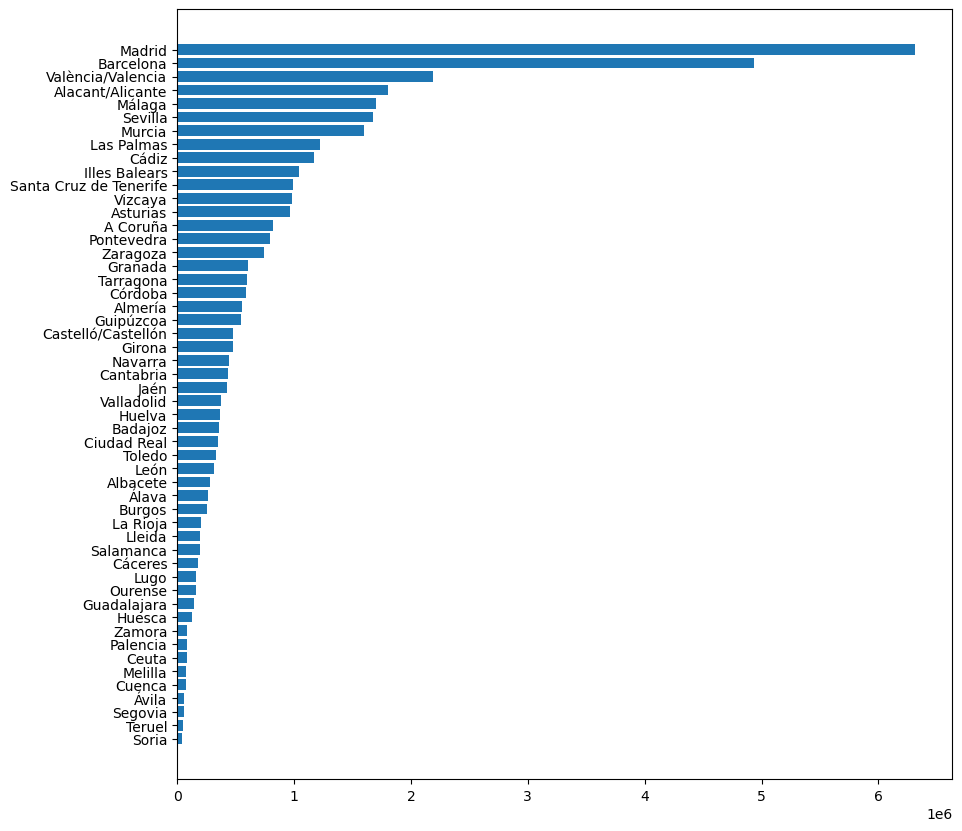

In [158]:
# 2. Realice una gráfica de barras sobre la población de cada ciudad, ordénela de menor a mayor y responda:

newData = data.groupby('Provincia', as_index=True).agg(
    Poblacion = ('Poblacion', np.sum)
)
newData = newData.sort_values('Poblacion')
newData.reset_index(inplace=True)

plt.subplots(1, 1, figsize=(10,10))
plt.barh(newData.Provincia, newData.Poblacion)

# a. ¿Cuál es la segunda ciudad más poblada?
print("La segunda ciudad más poblada es: {}".format(newData[-2:len(newData)-1]['Provincia']))

# b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
print("La posición de Granada en el ranking es {}".format(((newData.index[newData['Provincia'] == "Granada"][0])-len(newData))*-1))

In [171]:
# 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?
# Nota: Extremadura se compone por Cáceres y Badajoz
munsBadajoz = data.loc[data["Provincia"] == "Badajoz"]
munsCaceres = data.loc[data["Provincia"] == "Cáceres"]
munsExtremadura = pd.concat([munsBadajoz, munsCaceres])

cont = 0
for row in range(len(munsExtremadura)):
    if (data.iloc[row]['Poblacion'] > 5000):
        cont += 1

print("Hay {} municipios que superan los 5,000 habitantes en Extremadura".format(cont))

Hay 14 municipios que superan los 5,000 habitantes en Extremadura


In [178]:
# 4. ¿Cuál es el municipio situado más al Norte?

data
data.loc[data["Y"] == max(data.Y)][["Municipio","Provincia", "Poblacion"]]

,Municipio,Provincia,Poblacion
104,Viveiro,Lugo,16211.0


In [184]:
# 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los 
# municipios de la provincia de Granada

granadaMuns = data.loc[data["Provincia"] == "Granada"]
granadaMuns
media = granadaMuns["Poblacion"].mean()
mediana = granadaMuns["Poblacion"].median()
std = granadaMuns["Poblacion"].std()
max = granadaMuns["Poblacion"].max()
min = granadaMuns["Poblacion"].min()

print(" Media: {} \n Mediana: {} \n Desviación estándar: {} \n Máximo: {} \n Mínimo: {}".format(media, mediana, std, max, min))

 Media: 30217.85 
 Mediana: 17526.0 
 Desviación estándar: 50355.49171459277 
 Máximo: 239154.0 
 Mínimo: 10386.0


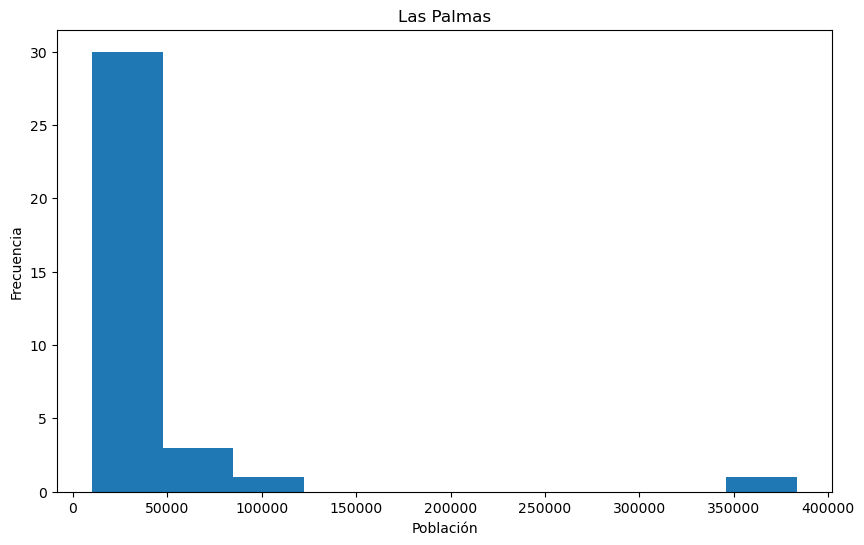

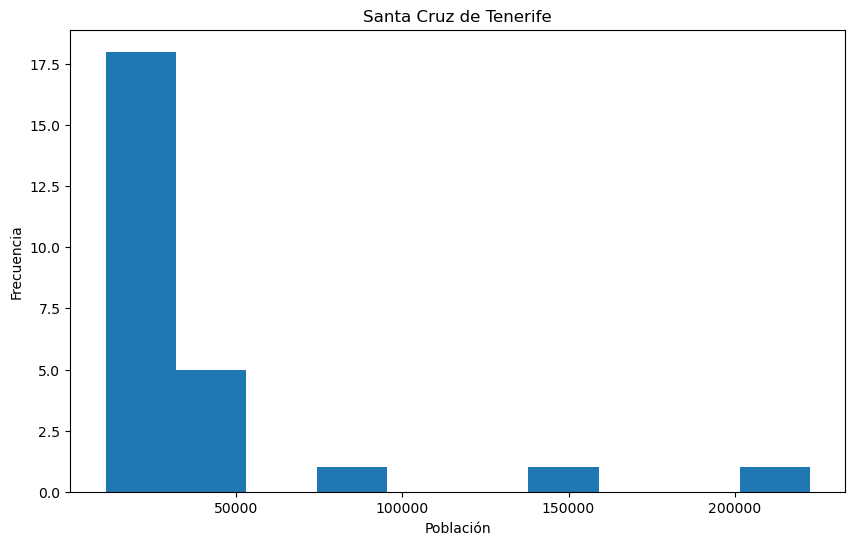

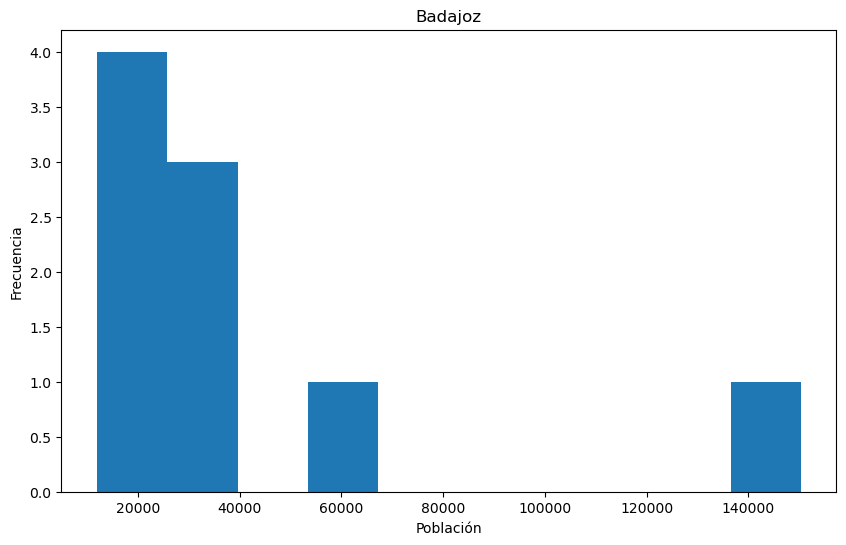

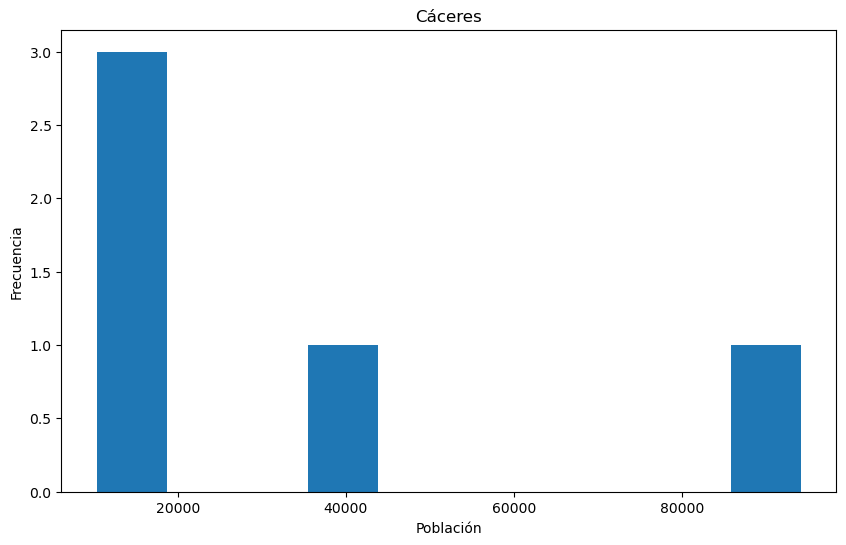

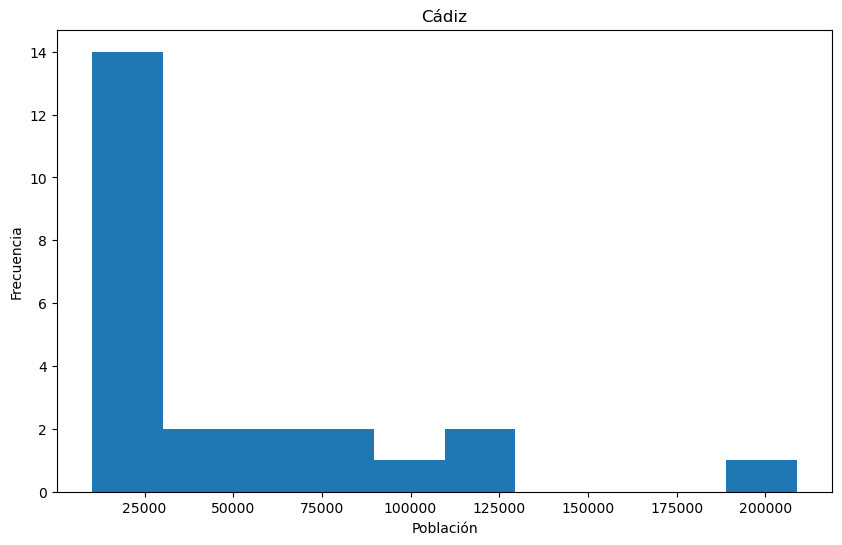

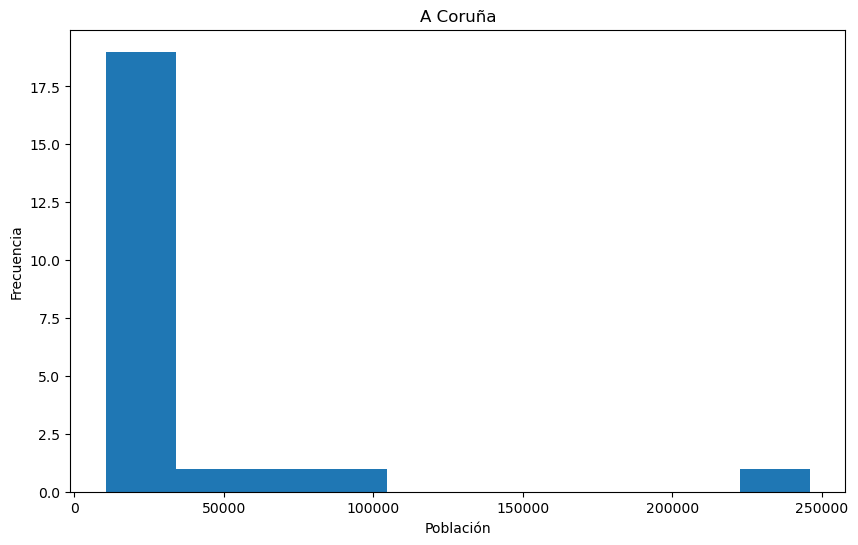

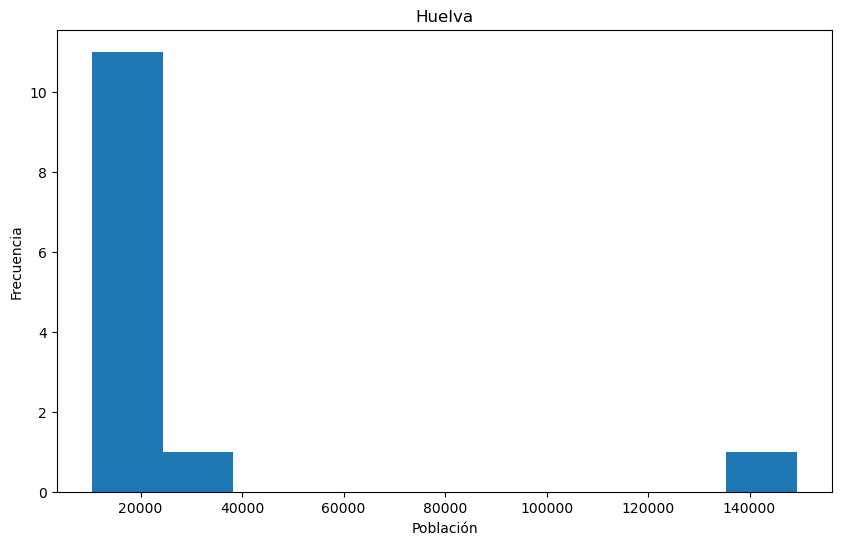

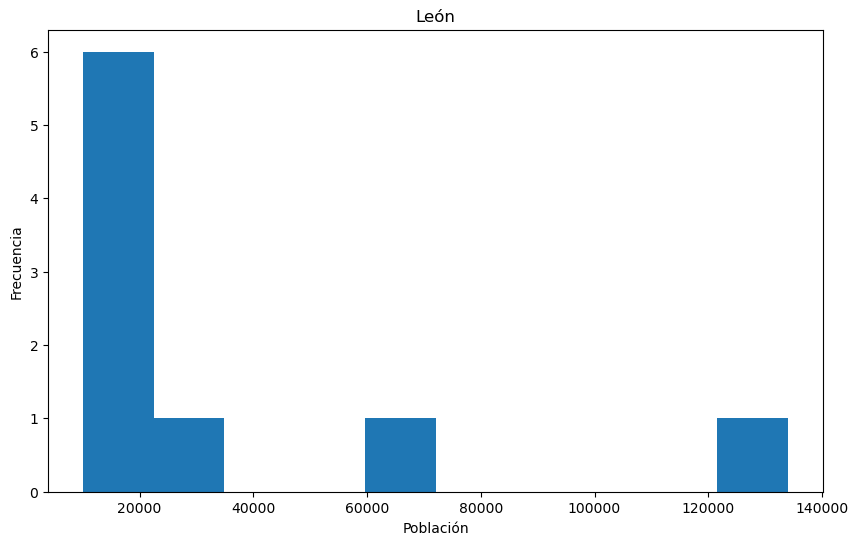

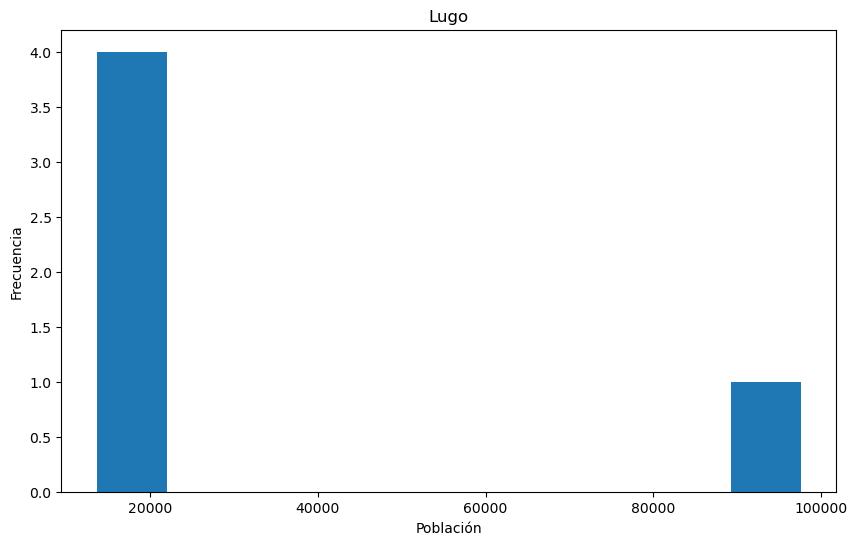

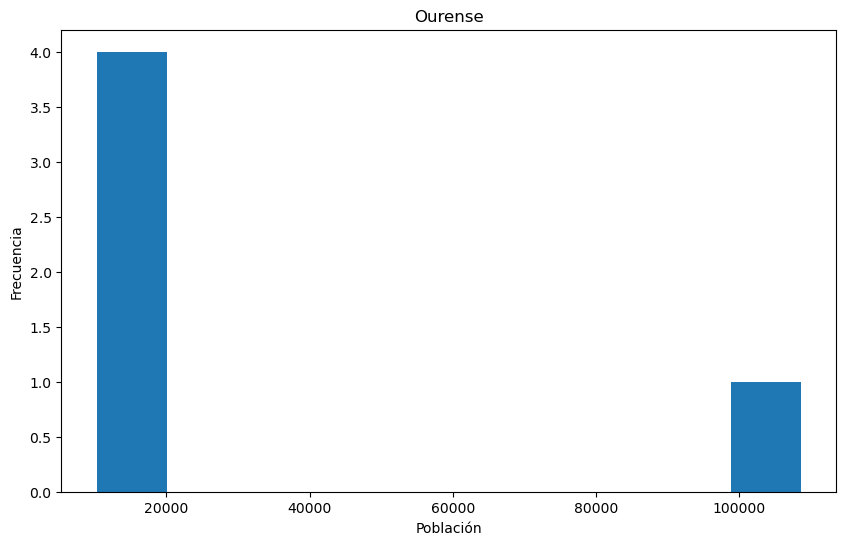

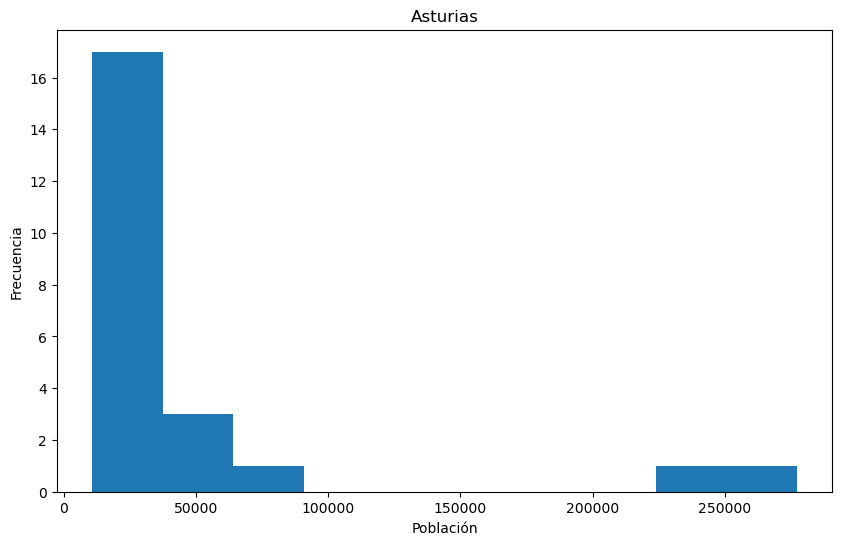

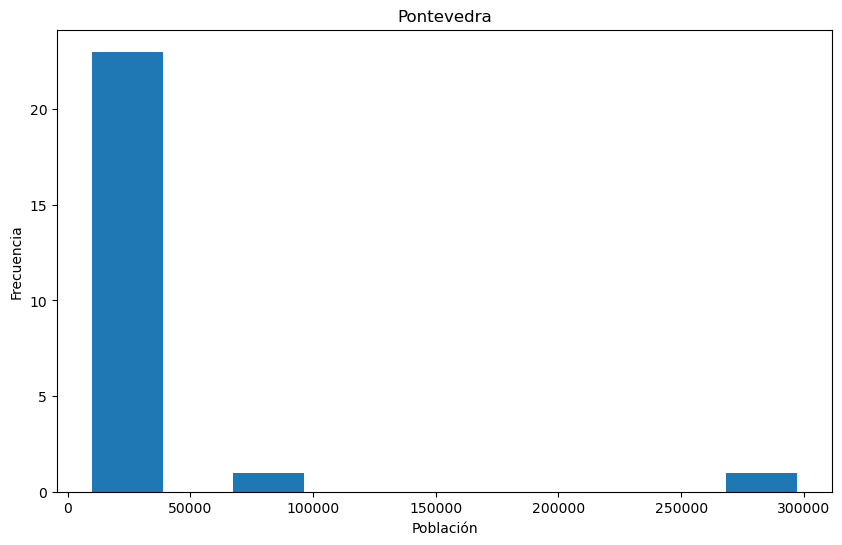

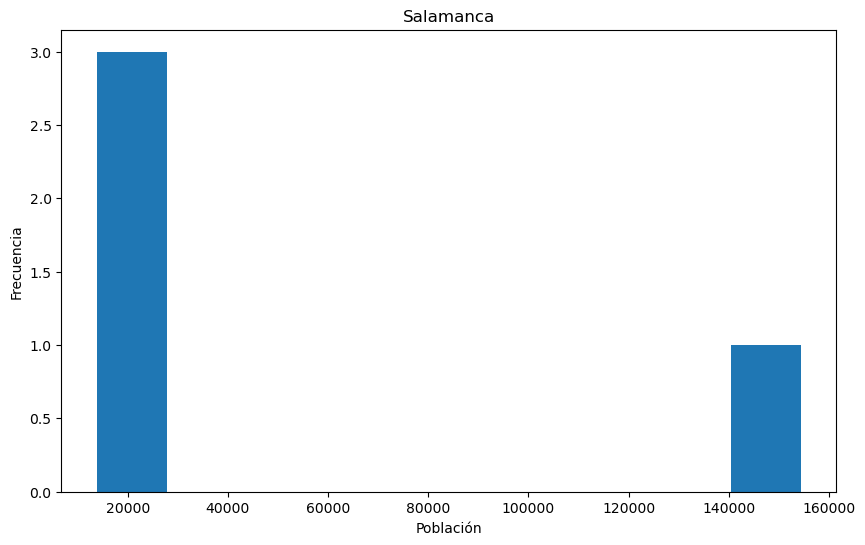

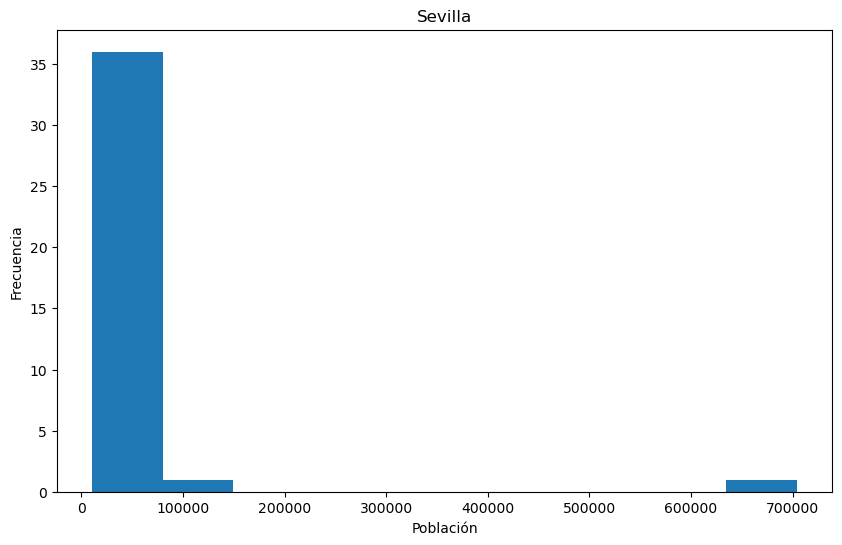

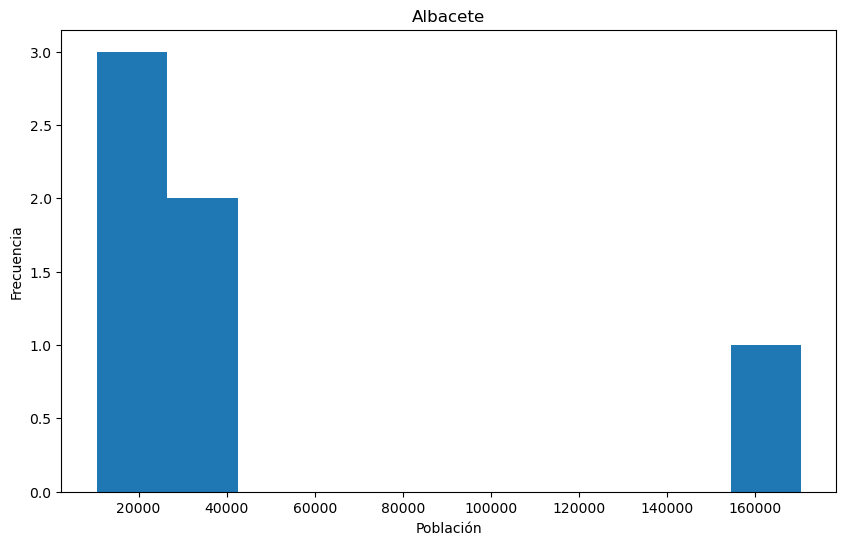

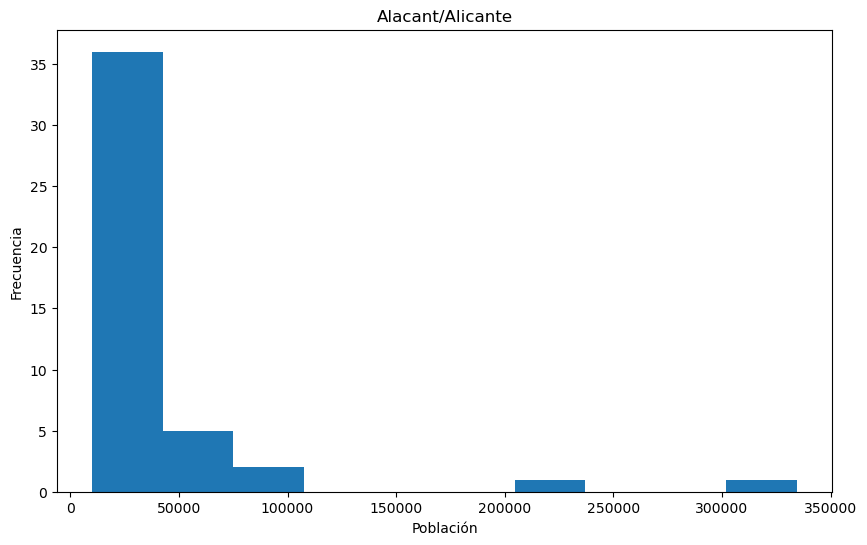

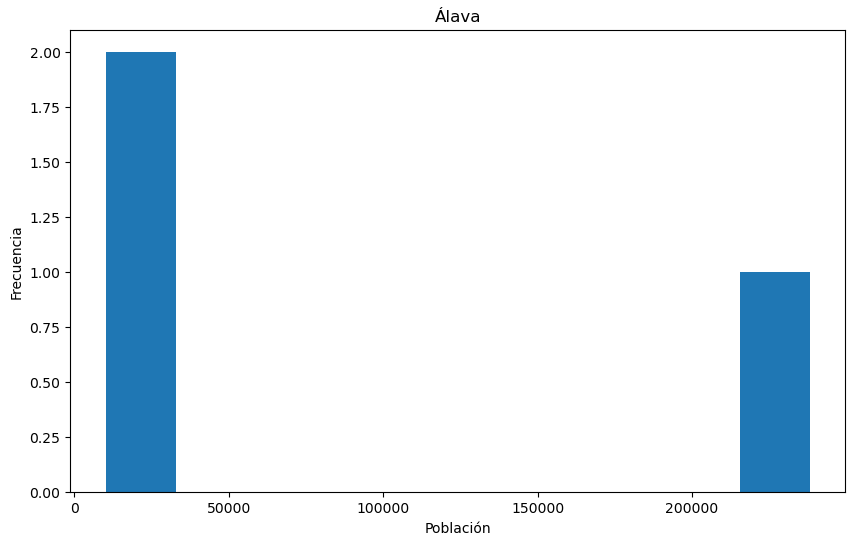

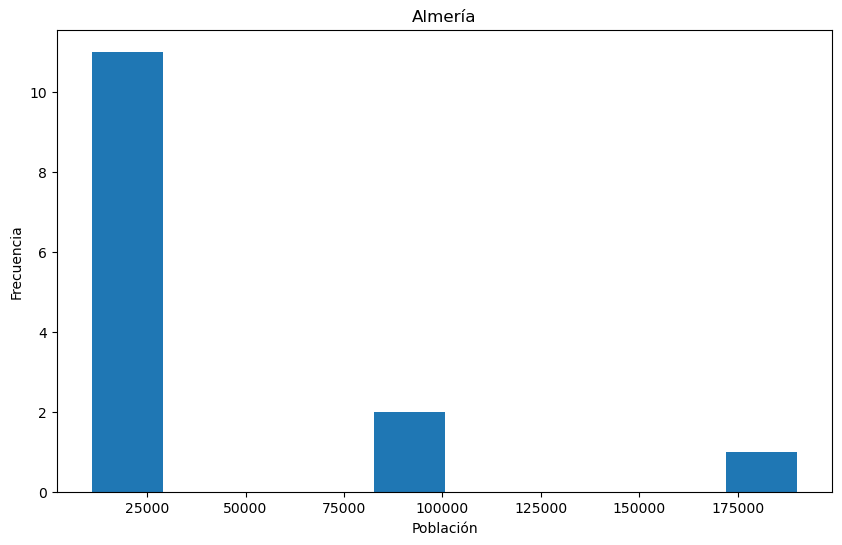

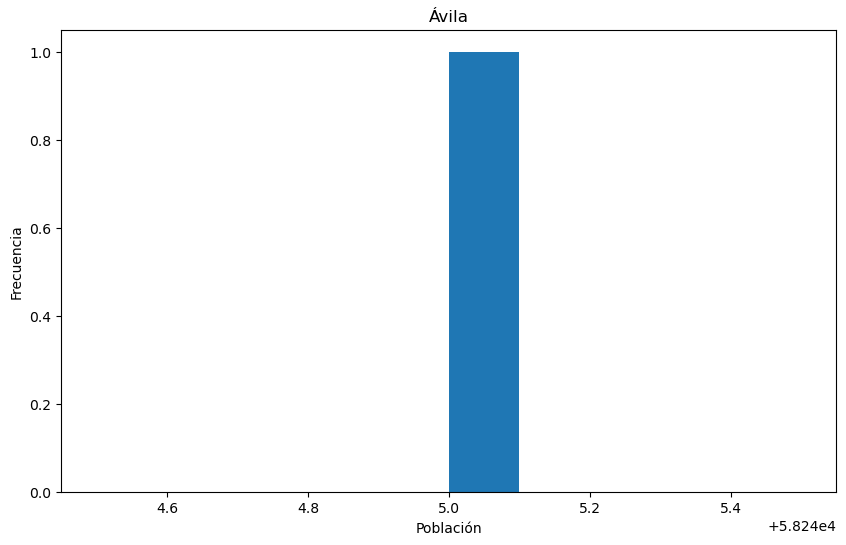

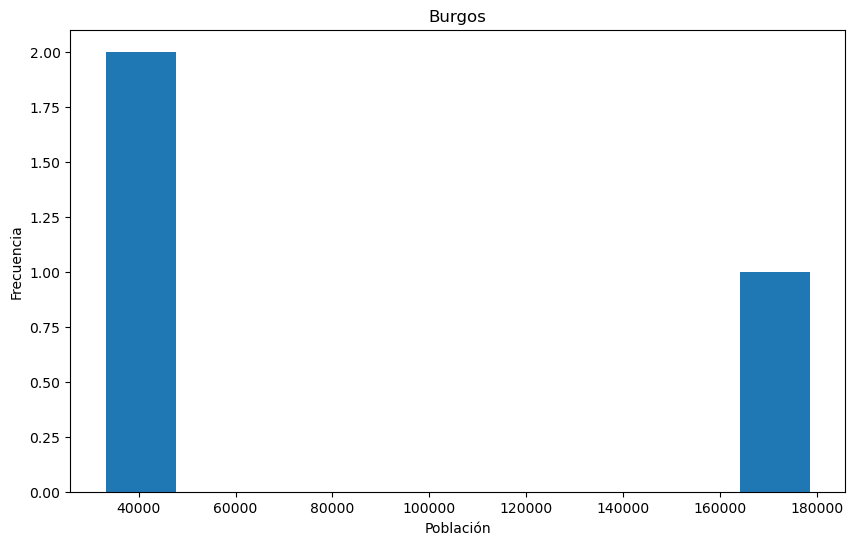

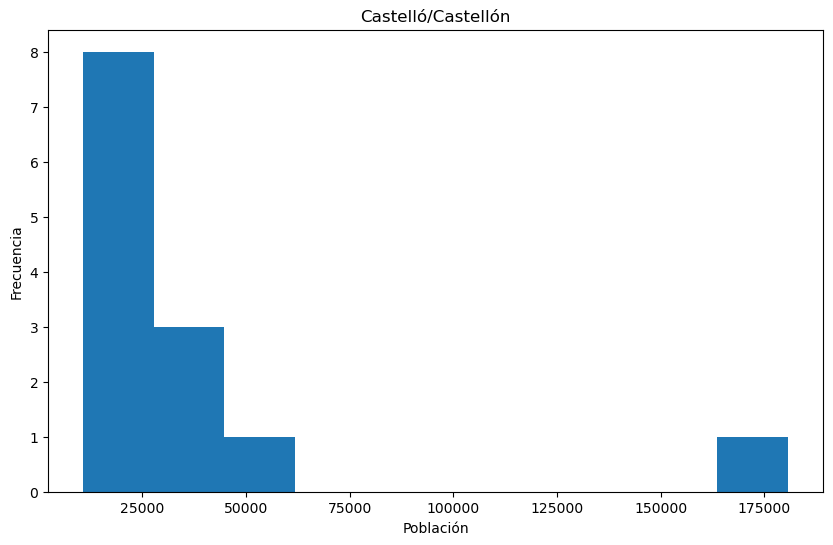

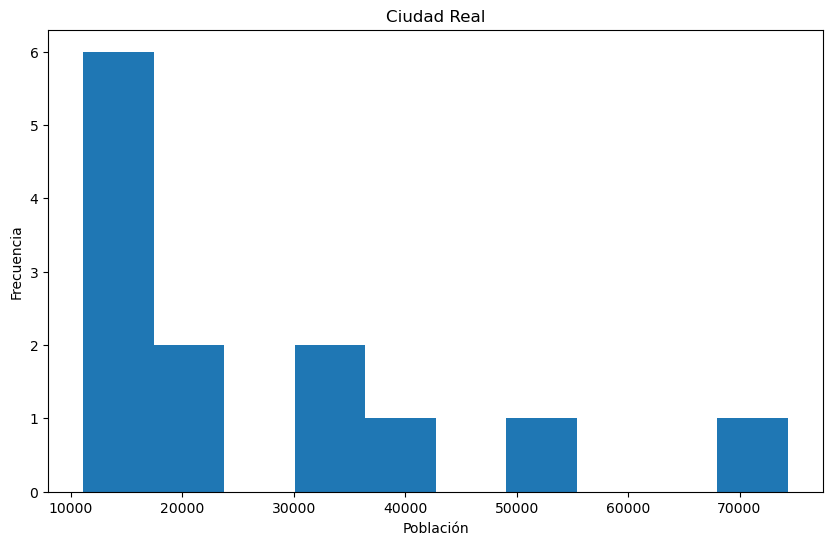

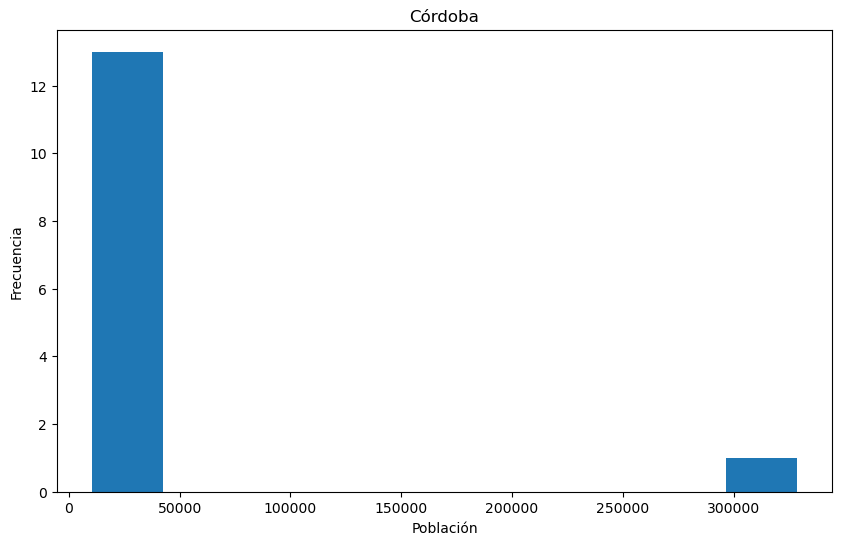

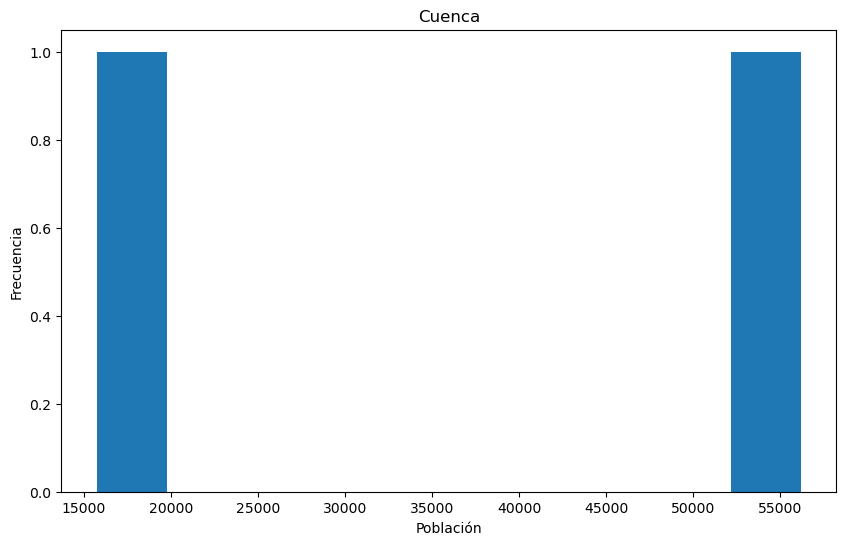

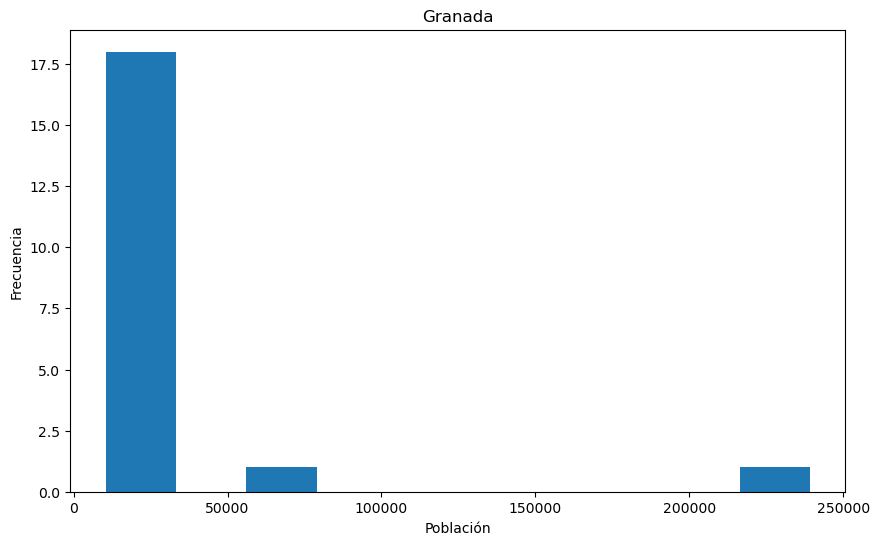

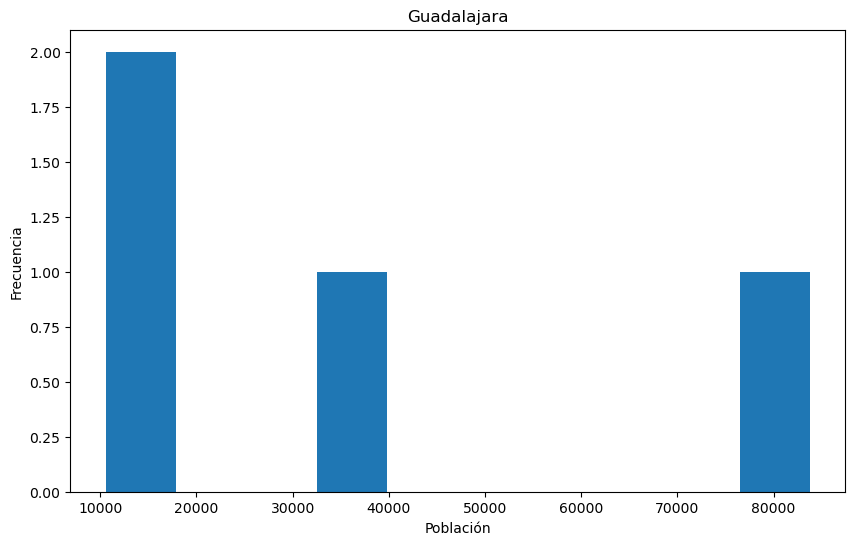

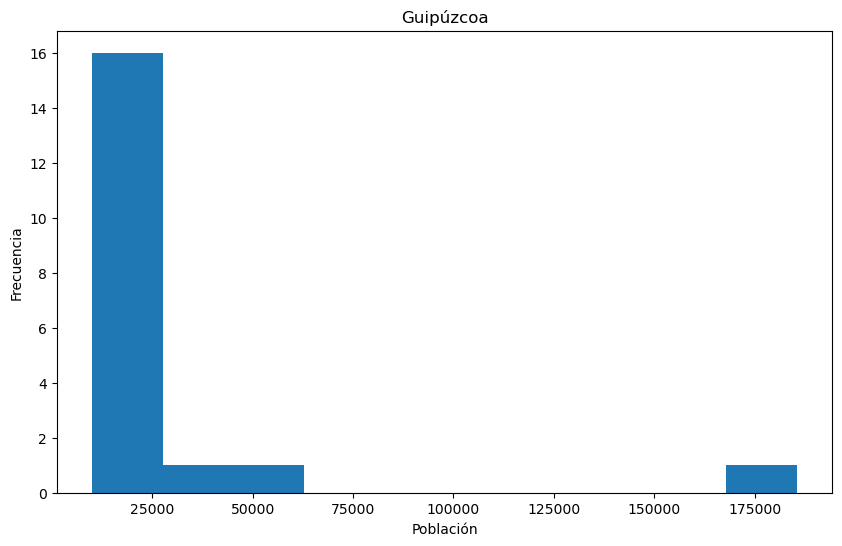

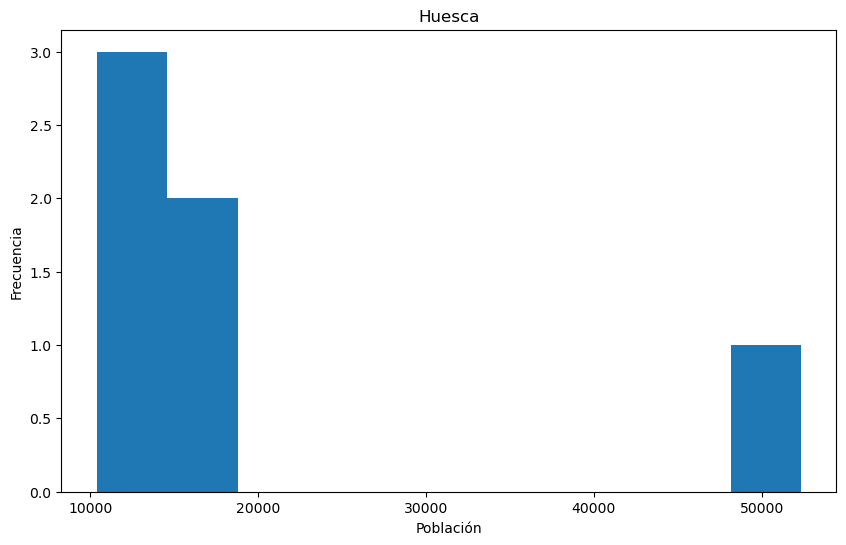

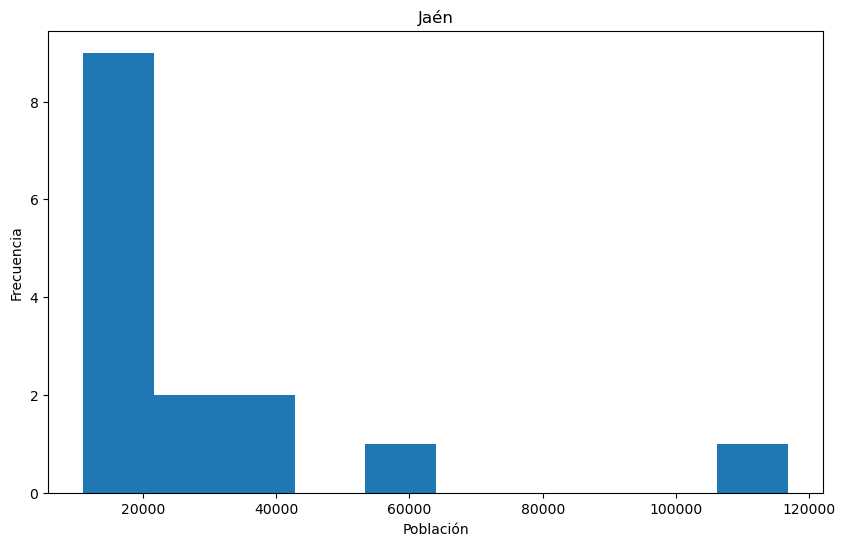

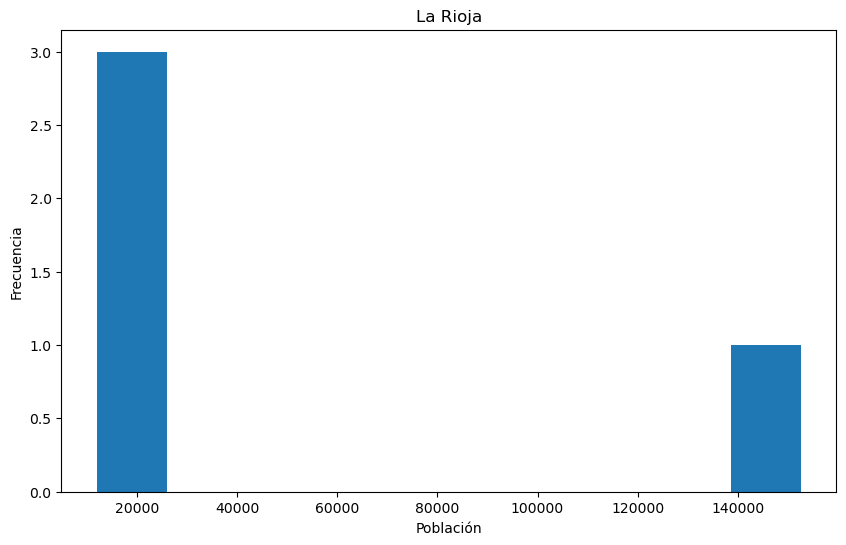

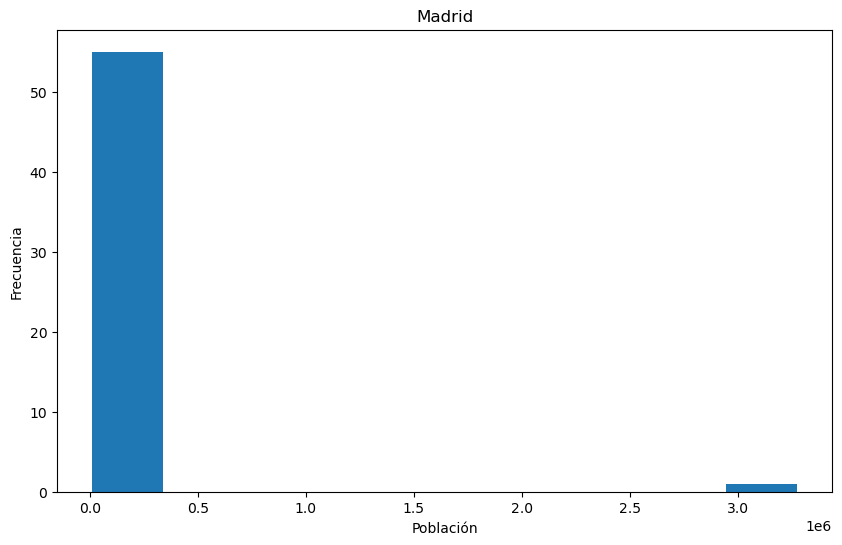

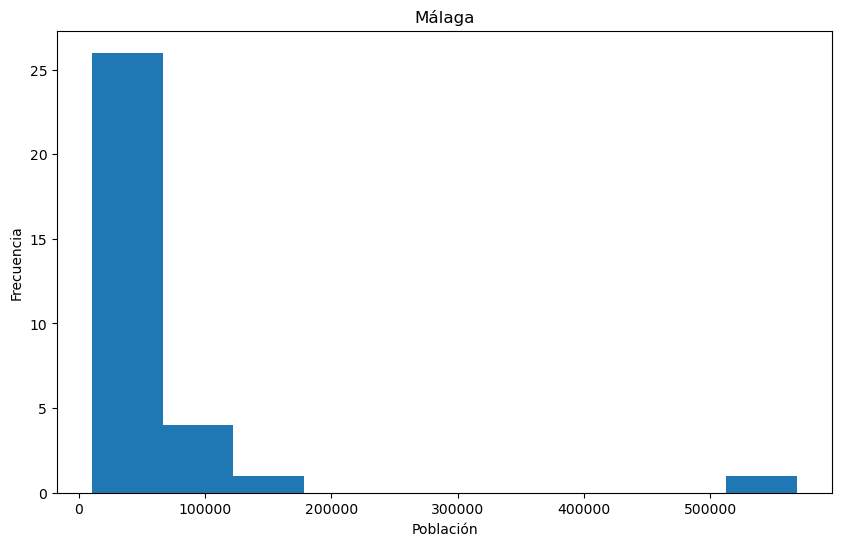

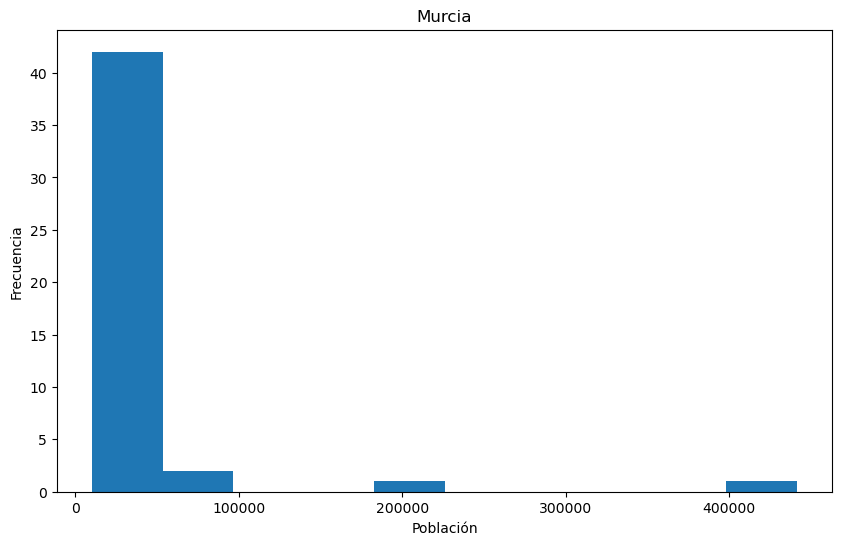

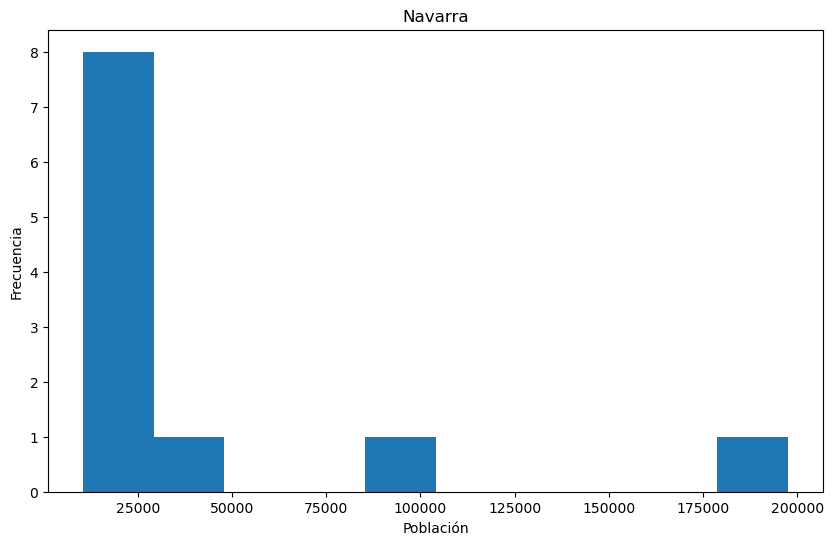

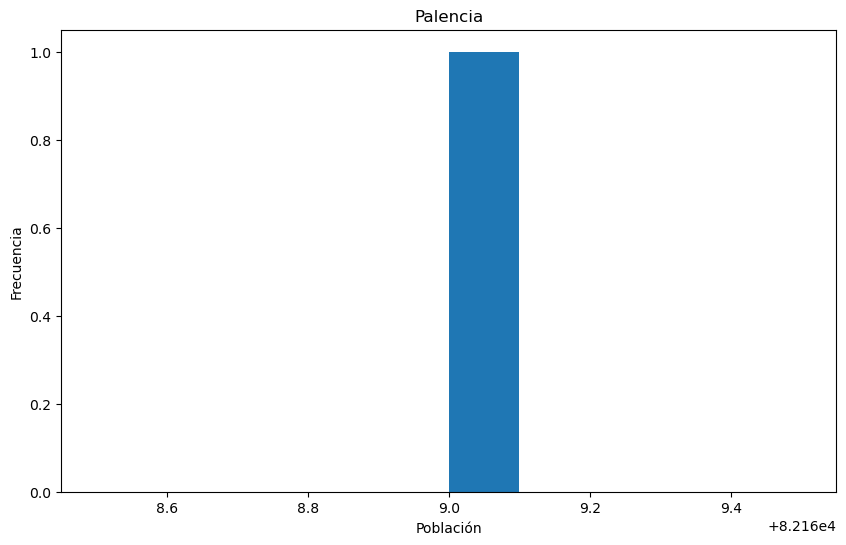

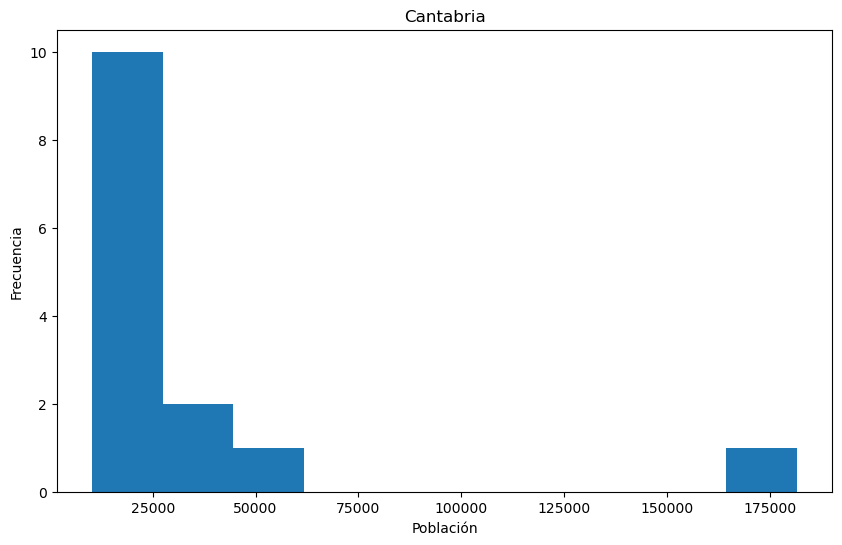

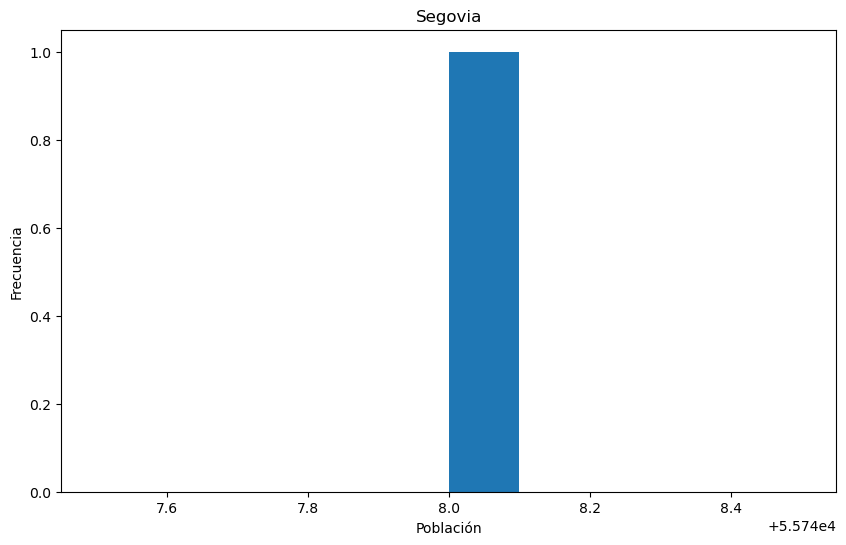

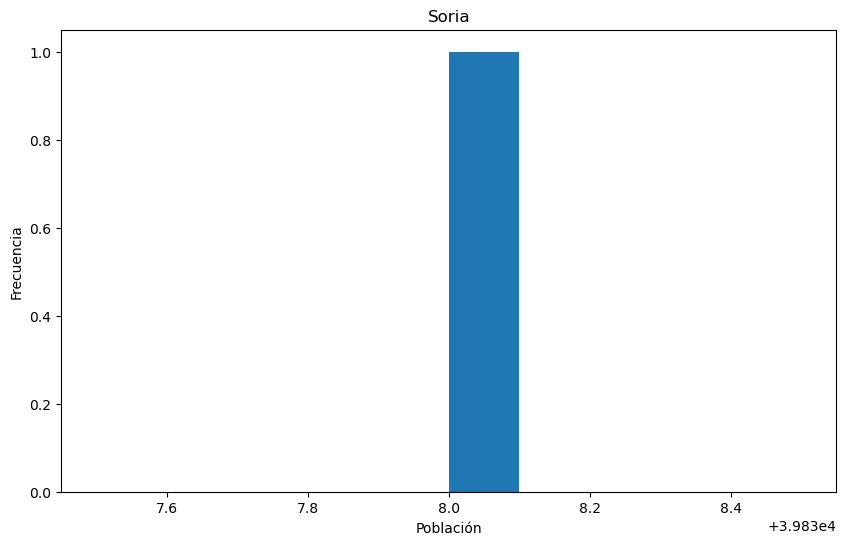

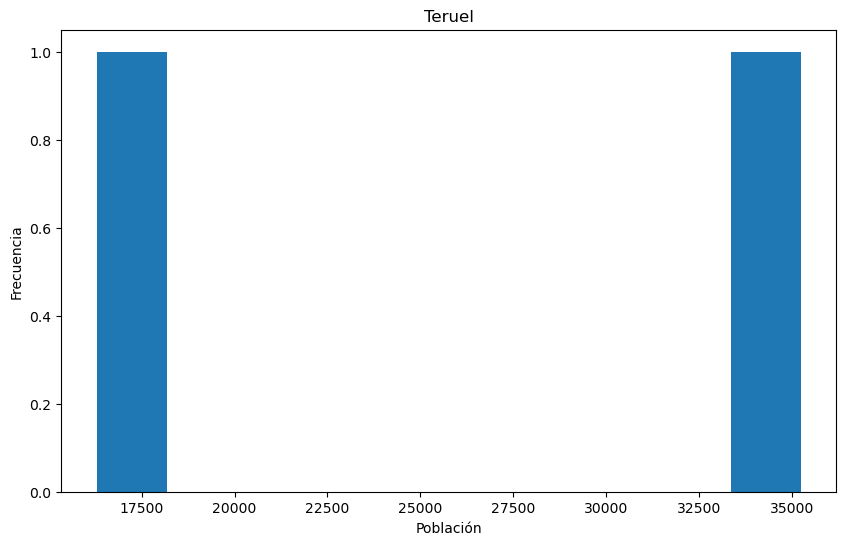

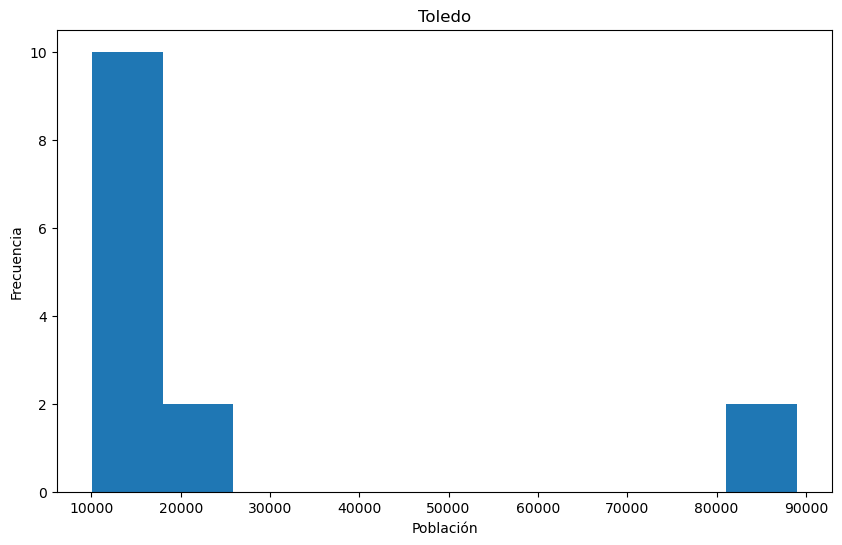

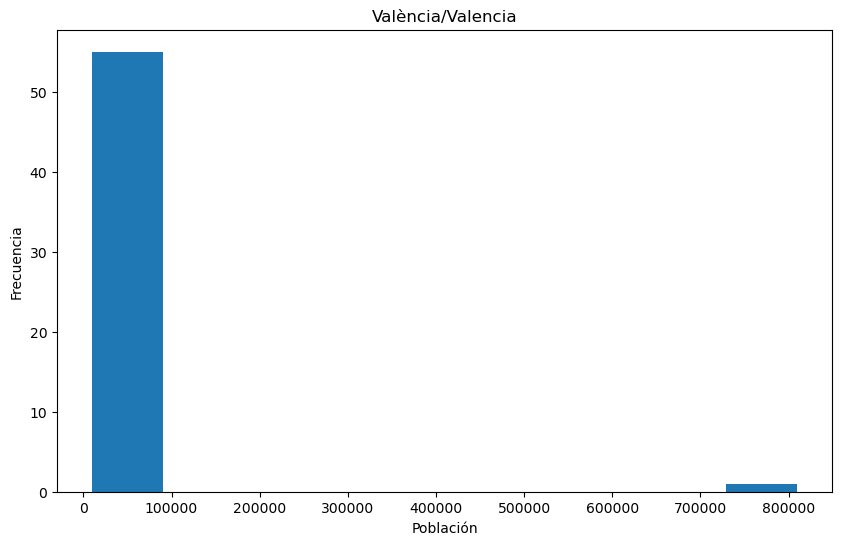

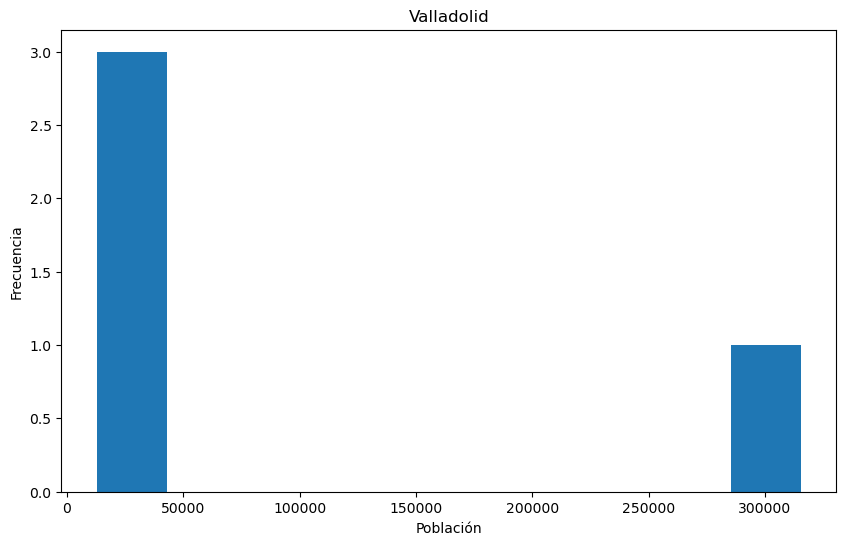

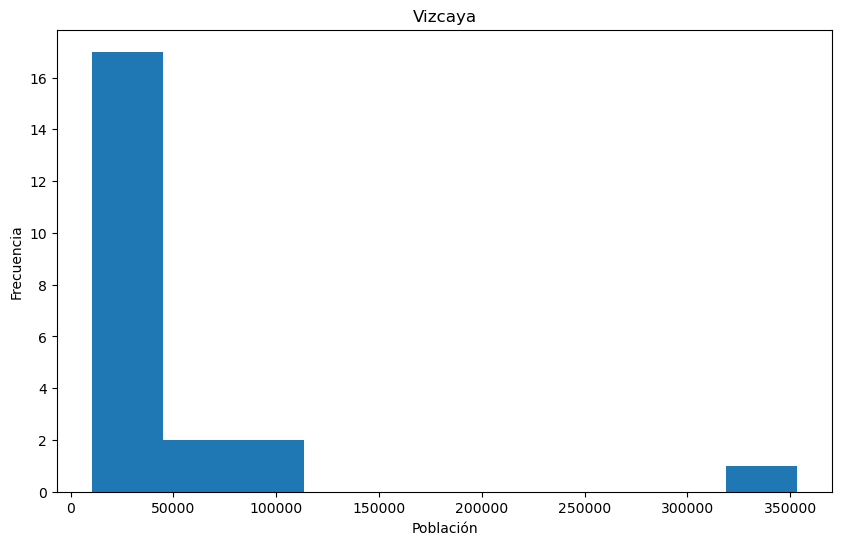

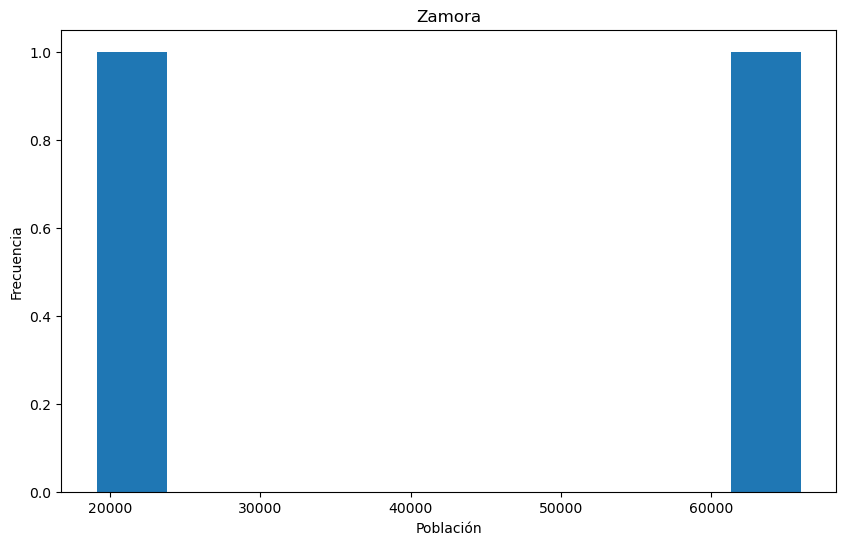

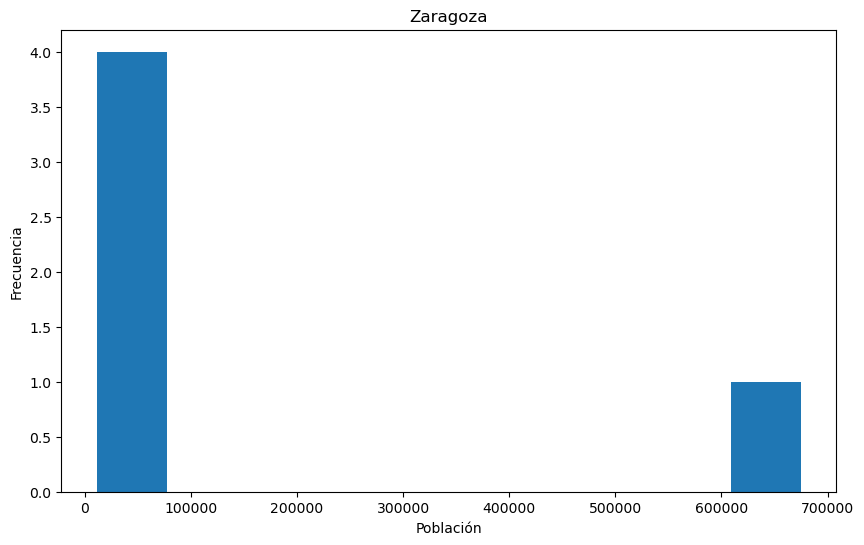

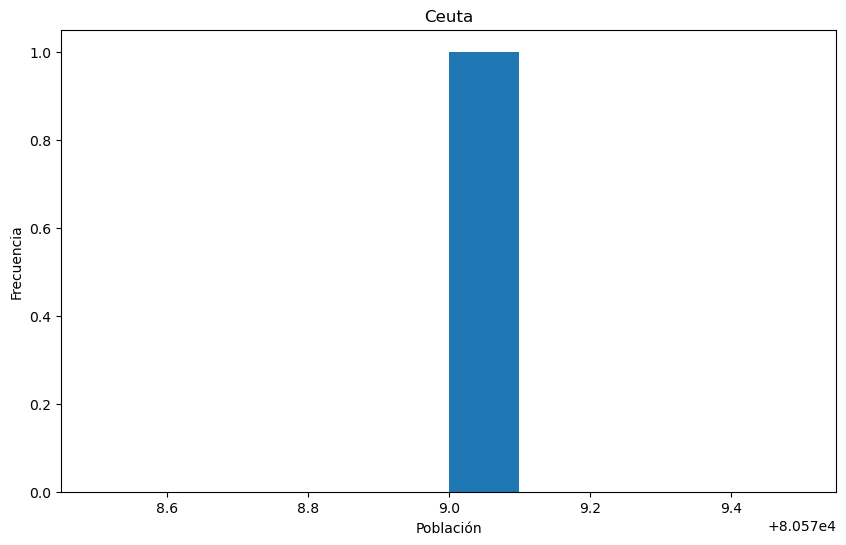

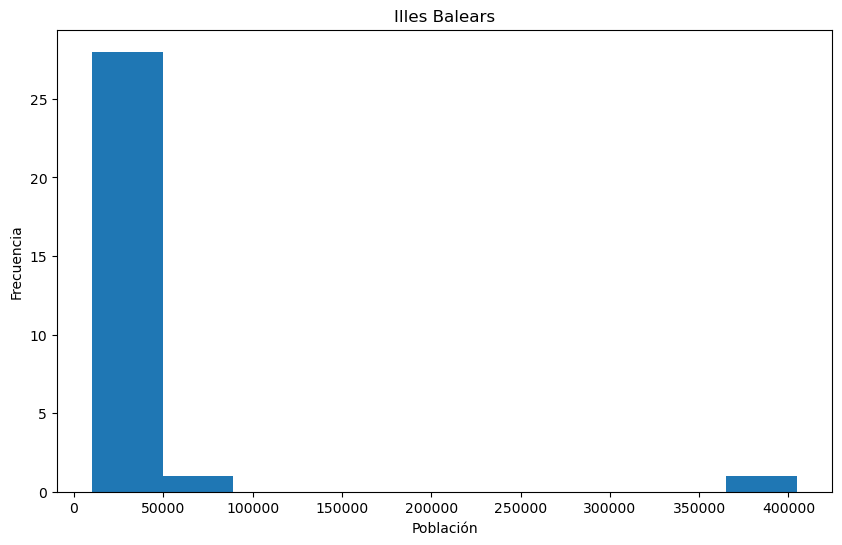

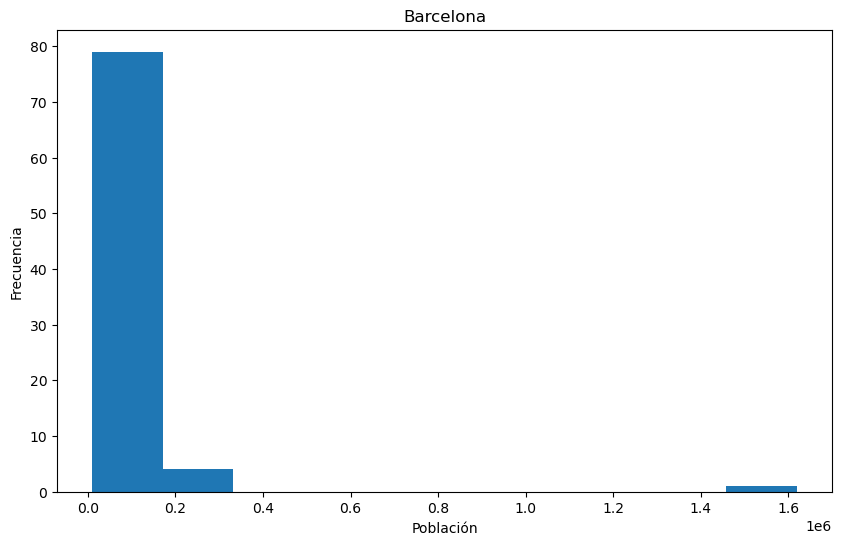

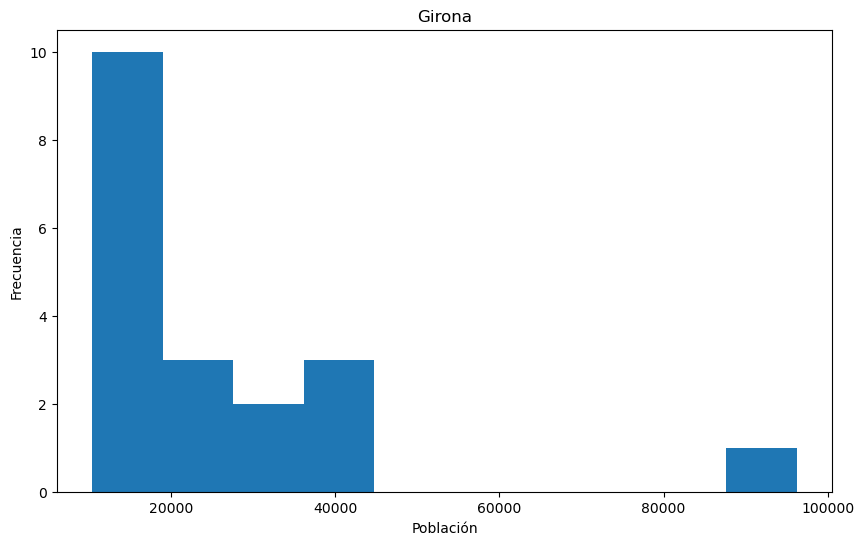

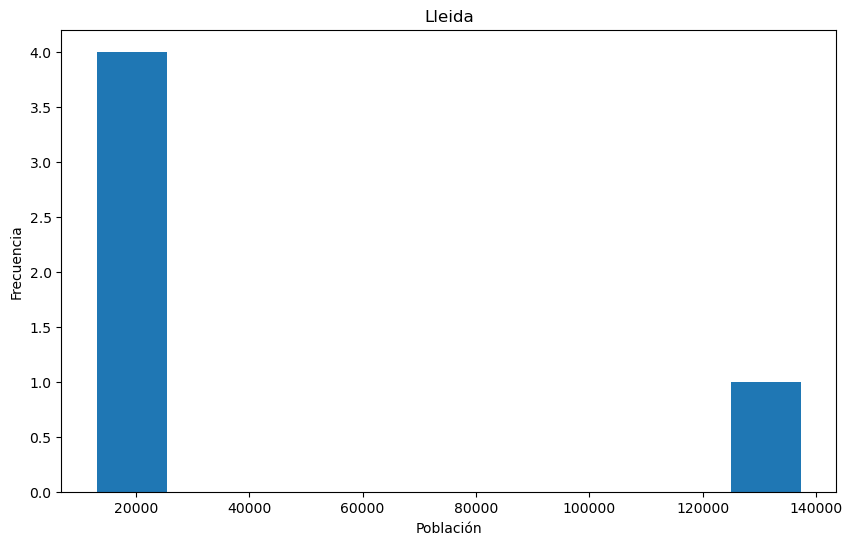

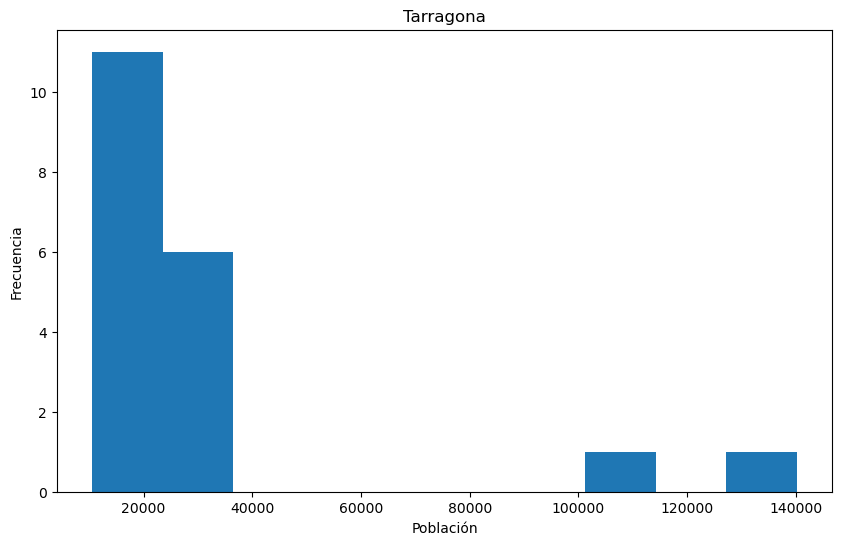

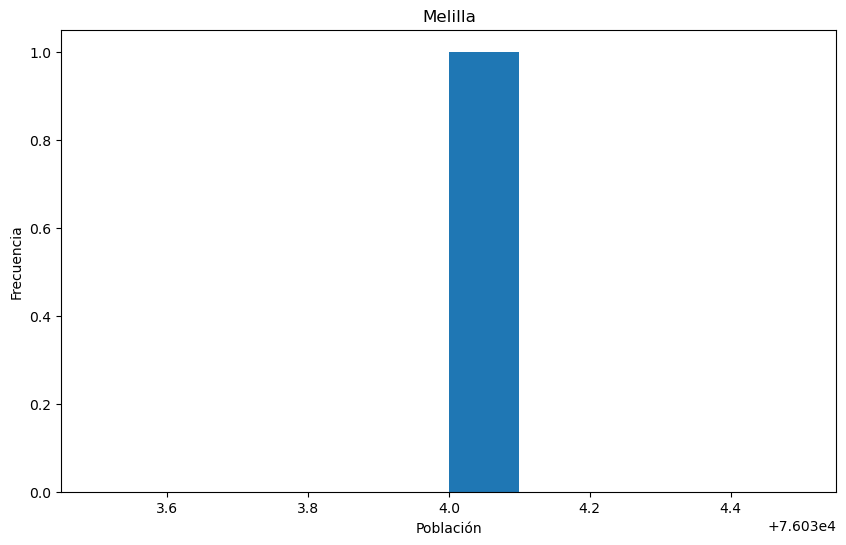

In [261]:
# 6. Realice un histograma con la población de los municipios para cada una de las provincias

provincias = data["Provincia"].unique()

for i in provincias:
    dataForHist = data.loc[data["Provincia"] == i][["Municipio","Poblacion"]]
    plt.subplots(1, 1, figsize=(10,6))
    plt.hist(dataForHist["Poblacion"])
    plt.xlabel("Población")
    plt.ylabel("Frecuencia")
    plt.title(i)
    plt.show()
